In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import functools as ft
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from openpyxl import load_workbook
import string

In [2]:
absent_symbol = "M"
save_filename = "UNVoting.xlsx"

In [3]:
# search here: https://digitallibrary.un.org/search?cc=Voting+Data&ln=en&p=ES-11%2F6&f=&action_search=Search&rm=&sf=&so=d&rg=50&c=Voting+Data&c=&of=hb&fti=0&fti=0

urls = [
    "https://digitallibrary.un.org/record/3959039?ln=en", #11/1
    "https://digitallibrary.un.org/record/3965954?ln=en", #11/2
    "https://digitallibrary.un.org/record/3967778?ln=en", #11/3
    "https://digitallibrary.un.org/record/3990400?ln=en", #11/4
    "https://digitallibrary.un.org/record/3994052?ln=en", #11/5
    "https://digitallibrary.un.org/record/4003921?ln=en", #11/6
    "https://digitallibrary.un.org/record/4053933?ln=en", #78/316
    "https://digitallibrary.un.org/record/4069734?ln=en", #79/184
    "https://digitallibrary.un.org/record/4076672?ln=en", #11/7
    #"https://digitallibrary.un.org/record/4076673?ln=en", #11/8
] 
total_nr_of_votes = len(urls)
total_nr_of_votes

9

In [4]:

def find_with_two_part_regex(left, right, text):
    regex = re.compile('{}(.*){}'.format(re.escape(left), re.escape(right)))
    return regex.findall(text)[0]


def read_votes_for_url(url):
    # adapted from https://stackoverflow.com/questions/328356/extracting-text-from-html-file-using-python
    html = urlopen(url).read()
    soup = BeautifulSoup(html, features="html.parser")

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    st = find_with_two_part_regex('Vote\n\n\n\n\n\n', '\n\nCollections', text)

    st = st.replace('  ', ' ' + absent_symbol + ' ')
    
    print(st)
    if st[:3] == " AF":
        st = " " + absent_symbol + st
    else:
        st = " " + st
    
    st = st.replace('CÔTE D\'IVOIRE', 'COTE D\'IVOIRE')
    st = st.replace('TURKEY', 'TÜRKİYE') 
    st = st.replace('TÜRKÝYE', 'TÜRKİYE')
    st = st.replace('NETHERLANDS (KINGDOM OF THE)', 'NETHERLANDS')

    countries = re.split(f'( [Y|N|A|{absent_symbol}] )', st)[1:]

    dic = {}
    for i in range(int(len(countries)/2)):
        dic[countries[2*i+1]] = countries[2*i][1]

    try:
        res_name = find_with_two_part_regex('\nResolution', '\n', text)
        res_date =  find_with_two_part_regex('\nVote date', '\n', text)
    except:
        print(url)
        res_name = "?"
        res_date = "? ?"

    return pd.DataFrame.from_dict(dic, orient='index', columns=[res_date + " (" + res_name + ")"])




In [5]:
read_votes_for_url(urls[0])

Y AFGHANISTAN Y ALBANIA A ALGERIA Y ANDORRA A ANGOLA Y ANTIGUA AND BARBUDA Y ARGENTINA A ARMENIA Y AUSTRALIA Y AUSTRIA M AZERBAIJAN Y BAHAMAS Y BAHRAIN A BANGLADESH Y BARBADOS N BELARUS Y BELGIUM Y BELIZE Y BENIN Y BHUTAN A BOLIVIA (PLURINATIONAL STATE OF) Y BOSNIA AND HERZEGOVINA Y BOTSWANA Y BRAZIL Y BRUNEI DARUSSALAM Y BULGARIA M BURKINA FASO A BURUNDI Y CABO VERDE Y CAMBODIA M CAMEROON Y CANADA A CENTRAL AFRICAN REPUBLIC Y CHAD Y CHILE A CHINA Y COLOMBIA Y COMOROS A CONGO Y COSTA RICA Y CÔTE D'IVOIRE Y CROATIA A CUBA Y CYPRUS Y CZECHIA N DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA Y DEMOCRATIC REPUBLIC OF THE CONGO Y DENMARK Y DJIBOUTI Y DOMINICA Y DOMINICAN REPUBLIC Y ECUADOR Y EGYPT A EL SALVADOR A EQUATORIAL GUINEA N ERITREA Y ESTONIA M ESWATINI M ETHIOPIA Y FIJI Y FINLAND Y FRANCE Y GABON Y GAMBIA Y GEORGIA Y GERMANY Y GHANA Y GREECE Y GRENADA Y GUATEMALA M GUINEA M GUINEA-BISSAU Y GUYANA Y HAITI Y HONDURAS Y HUNGARY Y ICELAND A INDIA Y INDONESIA A IRAN (ISLAMIC REPUBLIC OF) A IRAQ Y

,2022-03-02 (A/RES/ES-11/1)
AFGHANISTAN,Y
ALBANIA,Y
ALGERIA,A
ANDORRA,Y
ANGOLA,A
...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),M
VIET NAM,A
YEMEN,Y
ZAMBIA,Y


In [6]:
dfs = []
for url in urls:
    dfs.append(read_votes_for_url(url))



Y AFGHANISTAN Y ALBANIA A ALGERIA Y ANDORRA A ANGOLA Y ANTIGUA AND BARBUDA Y ARGENTINA A ARMENIA Y AUSTRALIA Y AUSTRIA M AZERBAIJAN Y BAHAMAS Y BAHRAIN A BANGLADESH Y BARBADOS N BELARUS Y BELGIUM Y BELIZE Y BENIN Y BHUTAN A BOLIVIA (PLURINATIONAL STATE OF) Y BOSNIA AND HERZEGOVINA Y BOTSWANA Y BRAZIL Y BRUNEI DARUSSALAM Y BULGARIA M BURKINA FASO A BURUNDI Y CABO VERDE Y CAMBODIA M CAMEROON Y CANADA A CENTRAL AFRICAN REPUBLIC Y CHAD Y CHILE A CHINA Y COLOMBIA Y COMOROS A CONGO Y COSTA RICA Y CÔTE D'IVOIRE Y CROATIA A CUBA Y CYPRUS Y CZECHIA N DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA Y DEMOCRATIC REPUBLIC OF THE CONGO Y DENMARK Y DJIBOUTI Y DOMINICA Y DOMINICAN REPUBLIC Y ECUADOR Y EGYPT A EL SALVADOR A EQUATORIAL GUINEA N ERITREA Y ESTONIA M ESWATINI M ETHIOPIA Y FIJI Y FINLAND Y FRANCE Y GABON Y GAMBIA Y GEORGIA Y GERMANY Y GHANA Y GREECE Y GRENADA Y GUATEMALA M GUINEA M GUINEA-BISSAU Y GUYANA Y HAITI Y HONDURAS Y HUNGARY Y ICELAND A INDIA Y INDONESIA A IRAN (ISLAMIC REPUBLIC OF) A IRAQ Y

Y AFGHANISTAN Y ALBANIA A ALGERIA Y ANDORRA A ANGOLA A ANTIGUA AND BARBUDA Y ARGENTINA A ARMENIA Y AUSTRALIA Y AUSTRIA M AZERBAIJAN N BAHAMAS A BAHRAIN A BANGLADESH A BARBADOS N BELARUS Y BELGIUM A BELIZE Y BENIN A BHUTAN A BOLIVIA (PLURINATIONAL STATE OF) Y BOSNIA AND HERZEGOVINA A BOTSWANA A BRAZIL A BRUNEI DARUSSALAM Y BULGARIA M BURKINA FASO A BURUNDI Y CABO VERDE A CAMBODIA M CAMEROON Y CANADA N CENTRAL AFRICAN REPUBLIC Y CHAD Y CHILE N CHINA Y COLOMBIA Y COMOROS A CONGO Y COSTA RICA Y COTE D'IVOIRE Y CROATIA N CUBA Y CYPRUS Y CZECHIA N DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA M DEMOCRATIC REPUBLIC OF THE CONGO Y DENMARK Y DJIBOUTI M DOMINICA Y DOMINICAN REPUBLIC Y ECUADOR A EGYPT A EL SALVADOR A EQUATORIAL GUINEA N ERITREA Y ESTONIA A ESWATINI N ETHIOPIA Y FIJI Y FINLAND Y FRANCE A GABON A GAMBIA Y GEORGIA Y GERMANY Y GHANA Y GREECE A GRENADA Y GUATEMALA A GUINEA A GUINEA-BISSAU A GUYANA A HAITI A HONDURAS Y HUNGARY Y ICELAND A INDIA A INDONESIA N IRAN (ISLAMIC REPUBLIC OF) A IRAQ Y

 AFGHANISTAN Y ALBANIA A ALGERIA Y ANDORRA A ANGOLA Y ANTIGUA AND BARBUDA A ARGENTINA A ARMENIA Y AUSTRALIA Y AUSTRIA M AZERBAIJAN Y BAHAMAS A BAHRAIN A BANGLADESH Y BARBADOS N BELARUS Y BELGIUM Y BELIZE M BENIN Y BHUTAN M BOLIVIA (PLURINATIONAL STATE OF) Y BOSNIA AND HERZEGOVINA A BOTSWANA A BRAZIL A BRUNEI DARUSSALAM Y BULGARIA N BURKINA FASO N BURUNDI Y CABO VERDE Y CAMBODIA M CAMEROON Y CANADA N CENTRAL AFRICAN REPUBLIC A CHAD Y CHILE A CHINA A COLOMBIA Y COMOROS M CONGO A COSTA RICA Y COTE D'IVOIRE Y CROATIA A CUBA Y CYPRUS Y CZECHIA N DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA M DEMOCRATIC REPUBLIC OF THE CONGO Y DENMARK Y DJIBOUTI M DOMINICA A DOMINICAN REPUBLIC M ECUADOR Y EGYPT A EL SALVADOR N EQUATORIAL GUINEA N ERITREA Y ESTONIA M ESWATINI A ETHIOPIA Y FIJI Y FINLAND Y FRANCE A GABON Y GAMBIA M GEORGIA Y GERMANY A GHANA Y GREECE A GRENADA Y GUATEMALA A GUINEA M GUINEA-BISSAU Y GUYANA N HAITI A HONDURAS N HUNGARY Y ICELAND A INDIA Y INDONESIA A IRAN (ISLAMIC REPUBLIC OF) A IRAQ Y 

In [7]:
for df in dfs:
    print(len(df))

193
193
193
193
193
193
193
193
193


In [8]:

#print(dfs)
df_final = ft.reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how="outer"), dfs)
df_final

,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
AFGHANISTAN,Y,Y,M,Y,Y,Y,M,M,M
ALBANIA,Y,Y,Y,Y,Y,Y,Y,Y,Y
ALGERIA,A,A,N,A,A,A,A,A,A
ANDORRA,Y,Y,Y,Y,Y,Y,Y,Y,Y
ANGOLA,A,A,A,Y,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),M,M,M,M,M,M,M,M,M
VIET NAM,A,A,N,A,A,A,A,A,A
YEMEN,Y,Y,A,Y,A,Y,A,A,A
ZAMBIA,Y,Y,M,Y,Y,Y,Y,M,A


In [9]:
#for col in df_final.columns:
#    counts_df[col] = df_final[col].value_counts()
#counts_df

value_counts_df = df_final.apply(lambda col: pd.Series(col).value_counts()).fillna(0)
value_counts_df = value_counts_df.reindex(["Y", "A", absent_symbol, "N"])
value_counts_df

,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
Y,141,140,93,143,94,141,99,81,93
A,35,38,58,35,73,32,60,80,65
M,12,10,18,10,12,13,25,18,17
N,5,5,24,5,14,7,9,14,18


Text(0.5, 1.0, 'Vote distribution (per country)')

<Figure size 1200x600 with 0 Axes>

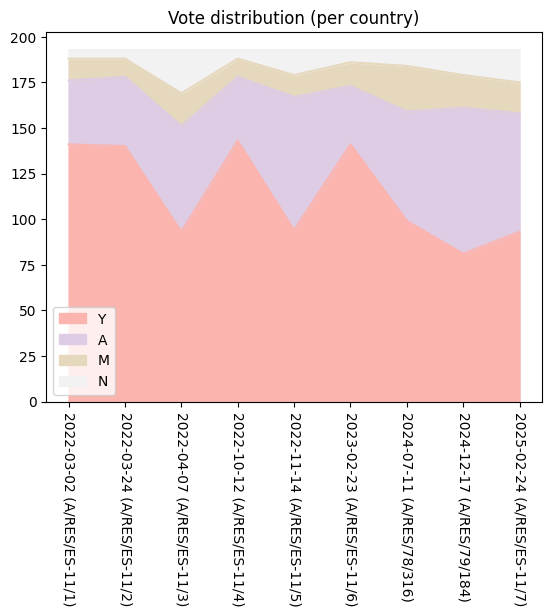

In [10]:


plt.figure(figsize=(12, 6))
ax = value_counts_df.transpose().plot.area(colormap="Pastel1")
ax.tick_params(axis='x', labelrotation=270)
plt.title("Vote distribution (per country)")


In [11]:
#df_final.to_csv("UN voting.csv")

In [12]:
def convert_vals(row, header):
    if row[header] == "Y":
        return 1.0
    if row[header] == "N":
        return -1.0
    if row[header] == "A":
        return 0.0
    if row[header] == absent_symbol:
        return 0.0
    return 0.0

def calc_scores(df):
    score_df = pd.DataFrame()
    for header in df.columns:
        score_df[header] = df.apply(convert_vals, axis=1, args=(header,))
    return score_df

score_df = calc_scores(df_final)

In [13]:
score_df.sum(axis=1)/total_nr_of_votes

AFGHANISTAN                           0.555556
ALBANIA                               1.000000
ALGERIA                              -0.111111
ANDORRA                               1.000000
ANGOLA                                0.111111
                                        ...   
VENEZUELA (BOLIVARIAN REPUBLIC OF)    0.000000
VIET NAM                             -0.111111
YEMEN                                 0.444444
ZAMBIA                                0.666667
ZIMBABWE                             -0.333333
Length: 193, dtype: float64

In [14]:
score_df['total_score'] = score_df.sum(axis=1)/total_nr_of_votes
score_df
#print(np.random.normal(0,1))
score_df['y'] = score_df.apply(lambda x: np.random.normal(0,0.5), axis=1)
#plot_df
score_df

,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),total_score,y
AFGHANISTAN,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.555556,0.181793
ALBANIA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,-0.644692
ALGERIA,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.111111,-0.364963
ANDORRA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,-0.777892
ANGOLA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.203530
...,...,...,...,...,...,...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.318531
VIET NAM,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.111111,-0.338266
YEMEN,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.444444,0.192009
ZAMBIA,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.666667,-0.109892


<AxesSubplot:xlabel='total_score', ylabel='y'>

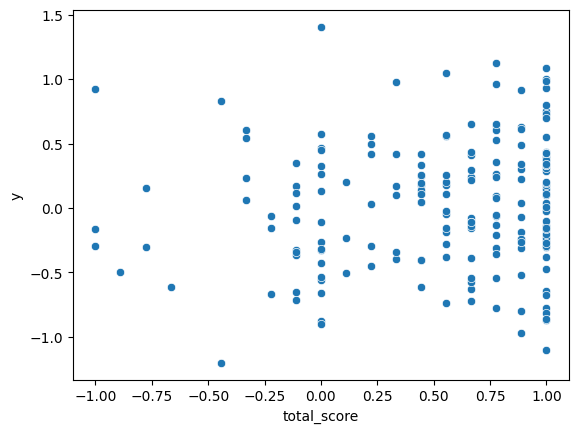

In [15]:
sns.scatterplot(data=score_df, x='total_score', y='y')

(-1.0, 1.0)

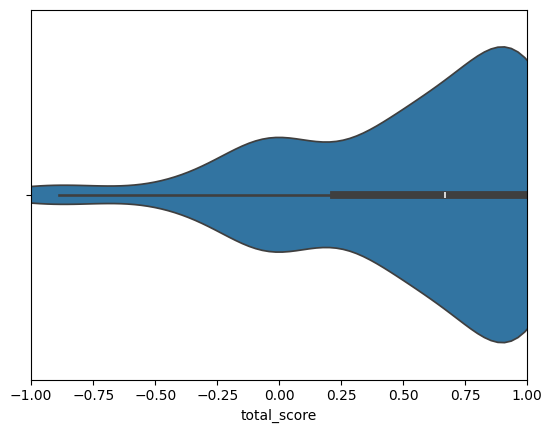

In [16]:
sns.violinplot(data=score_df, x='total_score')
#plt.figure()
plt.xlim([-1.0, 1.0])
# Blegh

[Text(0.5, 0, 'Pro-Russian - Pro-Ukrainian'),
 Text(0, 0.5, 'Number of countries'),
 Text(0.5, 1.0, 'Distribution of votes')]

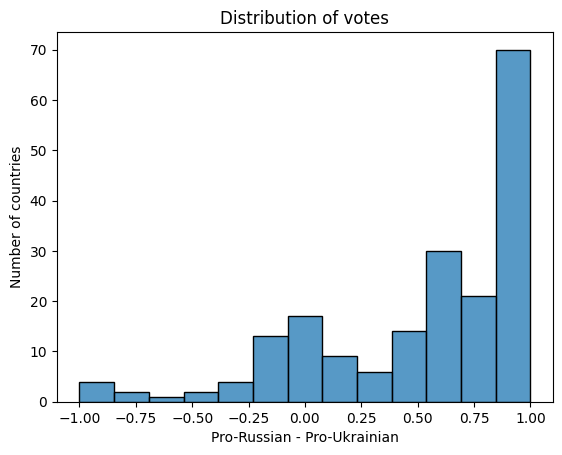

In [17]:
ax = sns.histplot(data=score_df, x="total_score", bins=13)
ax.set(xlabel='Pro-Russian - Pro-Ukrainian',
       ylabel='Number of countries',
       title='Distribution of votes')


## Save to colorcoded excel sheet
Code adapted from: https://www.geeksforgeeks.org/adding-conditional-formatting-to-excel-using-python-openpyxl/

In [18]:
df_final.to_excel(save_filename)

In [19]:
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import CellIsRule, ColorScaleRule, FormulaRule

In [20]:
wb = load_workbook(save_filename)
ws = wb.active

In [21]:
pink_fill = PatternFill(start_color="FFF2C6DE",
                       end_color="FFF2C6DE", fill_type="solid")
blue_fill = PatternFill(start_color="FFC6DEF1",
                       end_color="FFC6DEF1", fill_type="solid")
orange_fill = PatternFill(start_color="FFF7D9C4",
                       end_color="FFF7D9C4", fill_type="solid")
purple_fill = PatternFill(start_color="FFDBCDF0",
                       end_color="FFDBCDF0", fill_type="solid")
ws.conditional_formatting.add('A1:K194', CellIsRule(
    operator='equal', formula=['"Y"'], stopIfTrue=True, fill=blue_fill))
ws.conditional_formatting.add('A1:K194', CellIsRule(
    operator='equal', formula=['"N"'], stopIfTrue=True, fill=orange_fill))
ws.conditional_formatting.add('A1:K194', CellIsRule(
    operator='equal', formula=[f'"{absent_symbol}"'], stopIfTrue=True, fill=pink_fill))
ws.conditional_formatting.add('A1:K194', CellIsRule(
    operator='equal', formula=['"A"'], stopIfTrue=True, fill=purple_fill))
wb.save(save_filename)


# Generate LaTeX code

In [22]:
df_final

,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
AFGHANISTAN,Y,Y,M,Y,Y,Y,M,M,M
ALBANIA,Y,Y,Y,Y,Y,Y,Y,Y,Y
ALGERIA,A,A,N,A,A,A,A,A,A
ANDORRA,Y,Y,Y,Y,Y,Y,Y,Y,Y
ANGOLA,A,A,A,Y,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),M,M,M,M,M,M,M,M,M
VIET NAM,A,A,N,A,A,A,A,A,A
YEMEN,Y,Y,A,Y,A,Y,A,A,A
ZAMBIA,Y,Y,M,Y,Y,Y,Y,M,A


In [23]:
short_name_dict = {
    "Bolivia (Plurinational State Of)" : "Bolivia",
    "Democratic People'S Republic Of Korea" : "North Korea",
    "Iran (Islamic Republic Of)" : "Iran",
    "Democratic Republic Of The Congo" : "DR Congo",
    "Lao People'S Democratic Republic" : "Laos",
    "Micronesia (Federated States Of)" : "Micronesia",
    "Venezuela (Bolivarian Republic Of)" : "Venezuela",
    "Türki̇ye" : "Türkiye",
    "Saint Vincent And The Grenadines" : "St. Vincent + Grenadines",
    "United Republic Of Tanzania" : "Tanzania",
}

In [24]:
def print_latex(df, max_rows=45):
    start_row = "\\begin{tabular}{l|" + len(df.columns)*'c' + "}\n"
    start_row += "Country"
    for col in df.columns: 
        start_row += " & " + col.split(" ")[0][2:7]
    start_row += "\\\\\n\hline\n"
    
    st = start_row
    counter = 1
    for index, row in df.iterrows():
        if index.title() in short_name_dict:
            st += short_name_dict[index.title()]
        else:
            st += string.capwords(index)
        for col in df.columns:
            st += " & " 
            if row[col] == "Y":
                st += "\cellcolor{blue!15} "
            elif row[col] == "N": 
                st += "\cellcolor{yellow!20} "
            elif row[col] == "A": 
                st += "\cellcolor{magenta!20} "
            elif row[col] == absent_symbol:
                st += "\cellcolor{violet!20} "
            st += row[col]
        st += "\\\\\n"
        if counter == max_rows:
            st += "\\end{tabular}\n\n" + start_row
            counter = 1
        counter += 1 
    # Some & \cellcolor{blue!25}coloured & contents \\
    st += "\\end{tabular}"
    return st

print(print_latex(df_final, max_rows=33))
#len(df_final.columns)*"c"


\begin{tabular}{l|ccccccccc}
Country & 22-03 & 22-03 & 22-04 & 22-10 & 22-11 & 23-02 & 24-07 & 24-12 & 25-02\\
\hline
Afghanistan & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{violet!20} M & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{violet!20} M & \cellcolor{violet!20} M & \cellcolor{violet!20} M\\
Albania & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y\\
Algeria & \cellcolor{magenta!20} A & \cellcolor{magenta!20} A & \cellcolor{yellow!20} N & \cellcolor{magenta!20} A & \cellcolor{magenta!20} A & \cellcolor{magenta!20} A & \cellcolor{magenta!20} A & \cellcolor{magenta!20} A & \cellcolor{magenta!20} A\\
Andorra & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{blue!15} Y & \cellcolor{b